In [1]:
%reload_ext autoreload
%autoreload 2

import torch
import torchvision
import os
import utils
import dataset
import engine
from models import resnet
import config
import torchvision.datasets as datasets
import cuda
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import numpy as np

In [2]:
cuda, device = cuda.initialize_cuda(config.SEED)

GPU Available? True


In [3]:
trainset = dataset.torch_datasets(True, True, dataset_name='cifar10')
testset = dataset.torch_datasets(False, True, dataset_name='cifar10')

Files already downloaded and verified
Files already downloaded and verified


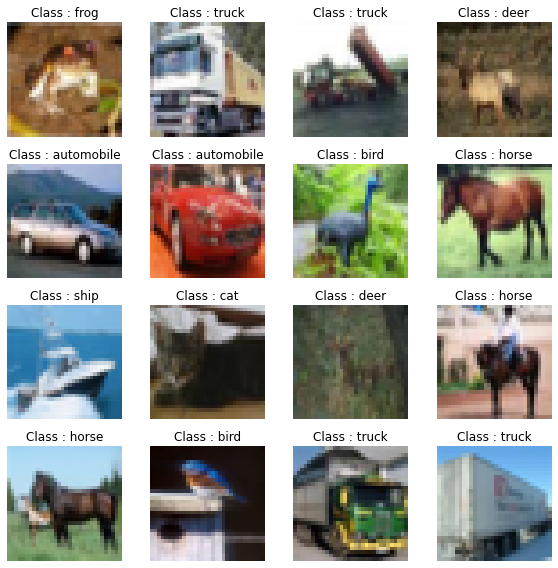

In [4]:
utils.show_imgs(trainset, 16, (8, 8))

In [5]:
mean, std = utils.get_stats(trainset)[0], utils.get_stats(trainset)[1]
print(mean, std)

(0.4914, 0.4822, 0.4465) (0.247, 0.2435, 0.2616)


In [9]:
transformations_list = [transforms.Normalize(mean, std)]
augmentations_list = [transforms.RandomRotation(7), 
                      transforms.RandomHorizontalFlip(0.3)]

In [10]:
trainset = dataset.torch_datasets(True, True, transformations_list, augmentations_list, dataset_name='cifar10')
testset = dataset.torch_datasets(False, True, transformations_list, dataset_name='cifar10')
train_dl = dataset.data_loader(trainset, config.BATCH_SIZE, config.NUM_WORKERS, cuda, shuffle=True)
test_dl = dataset.data_loader(testset, config.BATCH_SIZE, config.NUM_WORKERS, cuda, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


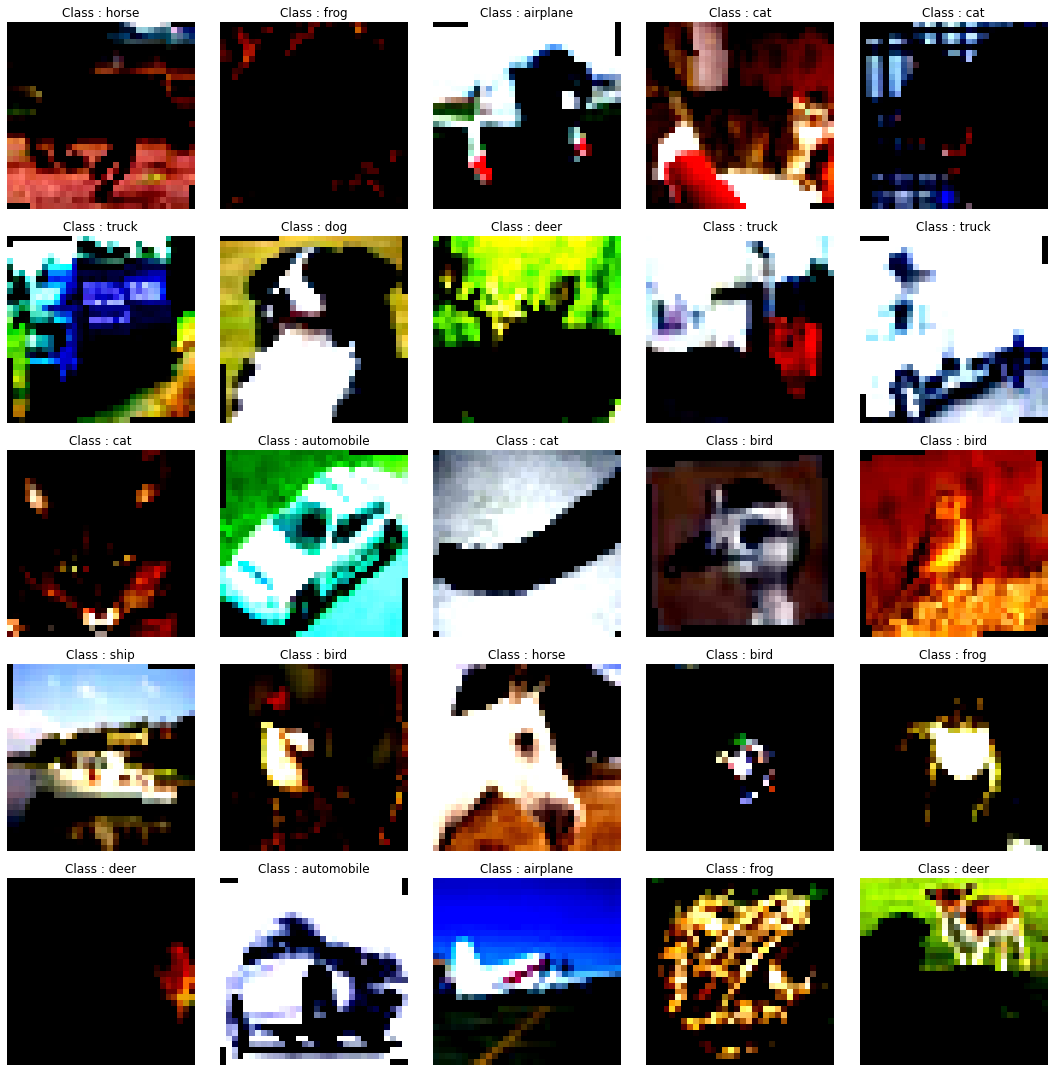

In [11]:
utils.show_batch(train_dl)

In [12]:
#Define model
model = resnet.ResNet18().to(device)

In [13]:
utils.summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [14]:
model = resnet.ResNet18().to(device)
loss_fn = utils.cross_entropy_loss_fn()
optimizer = utils.sgd_optimizer(model)
if config.DEBUG == True:
    config.EPOCHS = 30

test_loss = []
test_accuracy = []
train_losses = []
train_accuracy = []
misclassified_imgs = []
for epoch in range(config.EPOCHS):
    print(f"Running Epoch {epoch+1}/{config.EPOCHS}\n")
    engine.train(model, train_dl, optimizer, loss_fn, device, train_losses, train_accuracy)
    utils.StepLR_scheduler(optimizer, step_size=6)
    engine.test(model, test_dl, loss_fn, device, 25, test_loss, test_accuracy, misclassified_imgs)

  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]

Running Epoch 1/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0321, Accuracy: 6300/10000 (63.00%)

Running Epoch 2/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0269, Accuracy: 7040/10000 (70.40%)

Running Epoch 3/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0201, Accuracy: 7789/10000 (77.89%)

Running Epoch 4/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0166, Accuracy: 8190/10000 (81.90%)

Running Epoch 5/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0174, Accuracy: 8112/10000 (81.12%)

Running Epoch 6/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0153, Accuracy: 8296/10000 (82.96%)

Running Epoch 7/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0143, Accuracy: 8426/10000 (84.26%)

Running Epoch 8/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8568/10000 (85.68%)

Running Epoch 9/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0133, Accuracy: 8613/10000 (86.13%)

Running Epoch 10/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0141, Accuracy: 8539/10000 (85.39%)

Running Epoch 11/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0137, Accuracy: 8649/10000 (86.49%)

Running Epoch 12/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 8679/10000 (86.79%)

Running Epoch 13/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0124, Accuracy: 8733/10000 (87.33%)

Running Epoch 14/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0121, Accuracy: 8798/10000 (87.98%)

Running Epoch 15/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0129, Accuracy: 8758/10000 (87.58%)

Running Epoch 16/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0132, Accuracy: 8747/10000 (87.47%)

Running Epoch 17/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0130, Accuracy: 8777/10000 (87.77%)

Running Epoch 18/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0130, Accuracy: 8800/10000 (88.00%)

Running Epoch 19/20



  0%|                                                                                         | 0/1563 [00:00<?, ?it/s]


Validation set: Average loss: 0.0128, Accuracy: 8845/10000 (88.45%)

Running Epoch 20/20



Loss=0.06 Batch_ID=1562 Accuracy=96.63: 100%|██████████████████████████████████████| 1563/1563 [05:10<00:00,  5.03it/s]



Validation set: Average loss: 0.0131, Accuracy: 8865/10000 (88.65%)



# Misclassified Images

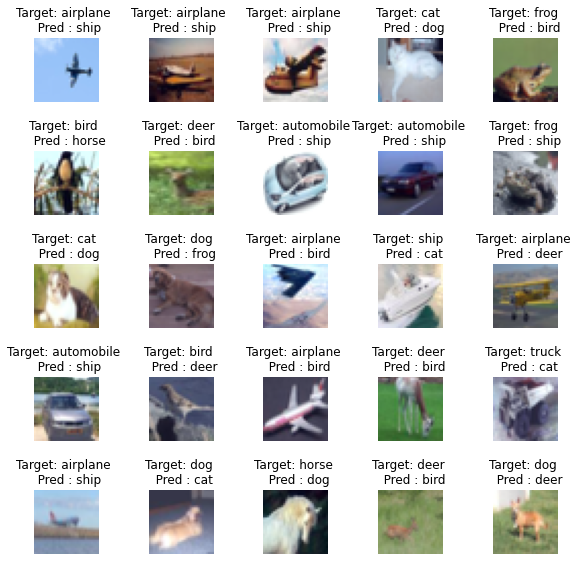

In [18]:
class_idx = trainset.class_to_idx
utils.plot_incorrect_images(misclassified_imgs, class_idx, plot_size=(8, 8))

# Validation Plots

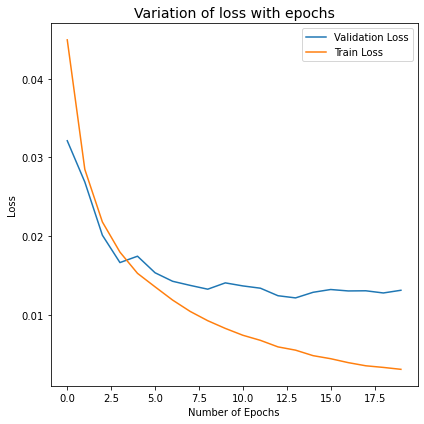

In [19]:
utils.plot_metrics([{'metric':test_loss, 'label':'Validation Loss'},
                    {'metric':train_losses, 'label':'Train Loss'}], "Loss")

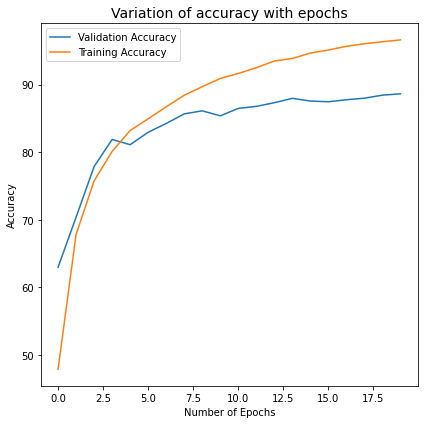

In [20]:
utils.plot_metrics([{'metric':test_accuracy, 'label':'Validation Accuracy'},
                    {'metric':train_accuracy, 'label':'Training Accuracy'}], "Accuracy")